In [1]:
import numpy as np
import cv2 as cv
import os
from ultralytics import YOLO

In [2]:
model = YOLO("yolo11n.pt")

results_train = model.predict("dataset/images/train")
results_val = model.predict("dataset/images/val")


image 1/639 /home/abdul/corona-obj/dataset/images/train/maksssksksss0.png: 480x640 4 persons, 2 handbags, 1 cell phone, 79.9ms
image 2/639 /home/abdul/corona-obj/dataset/images/train/maksssksksss1.png: 256x640 10 persons, 44.0ms
image 3/639 /home/abdul/corona-obj/dataset/images/train/maksssksksss10.png: 640x512 1 person, 71.4ms
image 4/639 /home/abdul/corona-obj/dataset/images/train/maksssksksss100.png: 384x640 5 persons, 1 handbag, 1 suitcase, 59.9ms
image 5/639 /home/abdul/corona-obj/dataset/images/train/maksssksksss101.png: 640x512 1 person, 65.2ms
image 6/639 /home/abdul/corona-obj/dataset/images/train/maksssksksss105.png: 448x640 12 persons, 1 cake, 3 chairs, 67.3ms
image 7/639 /home/abdul/corona-obj/dataset/images/train/maksssksksss106.png: 448x640 1 person, 56.4ms
image 8/639 /home/abdul/corona-obj/dataset/images/train/maksssksksss107.png: 640x512 1 person, 64.1ms
image 9/639 /home/abdul/corona-obj/dataset/images/train/maksssksksss108.png: 384x640 11 persons, 2 handbags, 4 suit

libpng warning: iCCP: Not recognizing known sRGB profile that has been edited


image 110/639 /home/abdul/corona-obj/dataset/images/train/maksssksksss233.png: 640x576 1 person, 1 car, 1 bench, 1 chair, 91.6ms
image 111/639 /home/abdul/corona-obj/dataset/images/train/maksssksksss234.png: 384x640 11 persons, 1 bench, 1 potted plant, 45.8ms
image 112/639 /home/abdul/corona-obj/dataset/images/train/maksssksksss235.png: 480x640 5 persons, 2 handbags, 49.4ms
image 113/639 /home/abdul/corona-obj/dataset/images/train/maksssksksss237.png: 448x640 2 persons, 50.8ms
image 114/639 /home/abdul/corona-obj/dataset/images/train/maksssksksss238.png: 448x640 12 persons, 2 handbags, 48.5ms
image 115/639 /home/abdul/corona-obj/dataset/images/train/maksssksksss241.png: 352x640 1 person, 1 tie, 59.8ms
image 116/639 /home/abdul/corona-obj/dataset/images/train/maksssksksss242.png: 480x640 1 person, 57.5ms
image 117/639 /home/abdul/corona-obj/dataset/images/train/maksssksksss243.png: 640x512 1 person, 63.8ms
image 118/639 /home/abdul/corona-obj/dataset/images/train/maksssksksss244.png: 44

In [3]:
print(len(results_train))
print(len(results_val))

639
214


In [6]:
# write resutls for a person only to a file
def extract_bboxes_with_cls(boxes, cls, cls_to_write):
    bboxes = []
    for box in boxes:
        if int(box.cls) == int(cls) and box.conf > 0.6:
            xywhn = np.squeeze(box.xywhn)
            bboxes.append(f"{cls_to_write} {xywhn[0]} {xywhn[1]} {xywhn[2]} {xywhn[3]}")
    return bboxes


def write_bboxes_to_file(bboxes, filename:str):
    with open(filename, "a") as f:
        for box in bboxes:
            f.write(box + "\n")

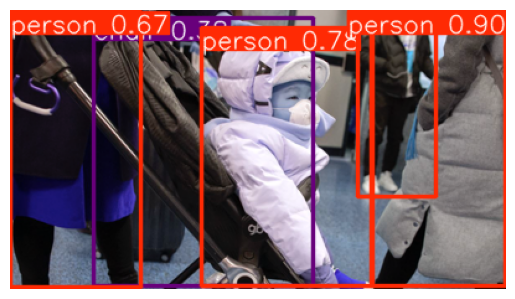

In [7]:
import matplotlib.pyplot as plt

plt.imshow(np.squeeze(results_val[0].plot()))
plt.axis("off")
plt.show()

In [8]:
import os

labels_dir = os.path.join(os.getcwd(), "dataset", "labels")
labels_train_dir = os.path.join(labels_dir, "train")    
labels_val_dir = os.path.join(labels_dir, "val")

In [9]:
# results_train[0].path.split("/")[-1].split(".")[0] + ".txt"
for r in results_train:
    filename = r.path.split("/")[-1].split(".")[0] + ".txt"
    boxes = extract_bboxes_with_cls(r.boxes, 0, 3)
    write_bboxes_to_file(boxes, os.path.join(labels_train_dir, filename))

In [10]:
for r in results_val:
    filename = r.path.split("/")[-1].split(".")[0] + ".txt"
    boxes = extract_bboxes_with_cls(r.boxes, 0, 3)
    write_bboxes_to_file(boxes, os.path.join(labels_val_dir, filename))

In [ ]:
# zip a folder
import shutil

shutil.make_archive("dataset", "zip", "dataset")

'/home/abdul/corona-obj/dataset,.zip'